In [1]:
# https://www.tensorflow.org/tutorials/keras/classification

In [3]:
# import tensorflow ans Keras
import tensorflow as tf

# Helper library
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


## Import MNIST dataset

In [5]:
# This guide uses the Fashion MNIST dataset which contains 70,000 grayscale image in 10 categories.
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [7]:
# print y_train unique value
np.unique(y_train)
# These are the total label used as Classification
# Each label is an integer between 0 and 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
# Each image is mapped to a single label.
# Since the class names are not included in dataset,
# we store class in list and later we will used index in list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# Check the input shape
x_train[0].shape
# We Can know the input is 28 x 28 
# Only 2 dimension which means gray scale

(28, 28)

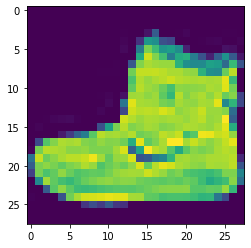

In [13]:
# plot one sample
plt.imshow(x_train[0])

In [17]:
# check the training and test shape
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )
# We can see there are 60000 for training and 10000 for testing

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


## Preprocess the data

In [19]:
# The data must be preprocessed before training the nework
# check the max and minimum Numbers between input array
print(x_train[0].min(), x_train[0].max())
# we can see min is 0 and max is 255

0 255


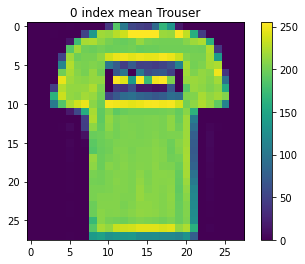

In [28]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.title(str(y_train[1]) + ' index mean ' + class_names[1])
plt.show()

In [29]:
# Normalize the input image input values inside 0 to 1
# to convert maximum number to 1 
# divide each element by max element in input
x_train = x_train/255.0
x_test = x_test/255.0

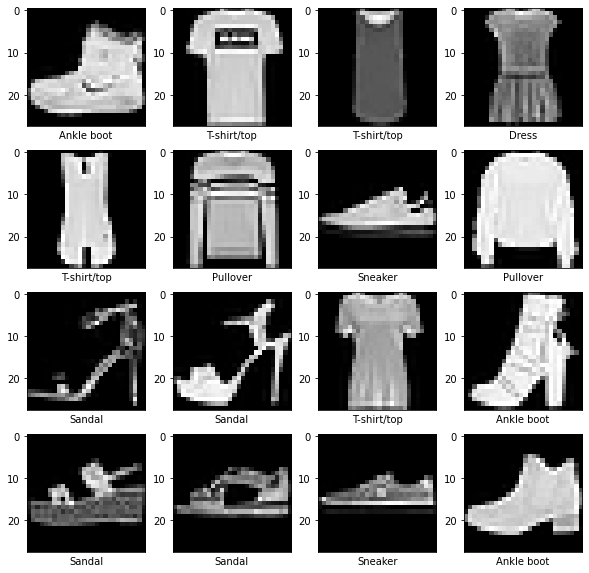

In [32]:
# validaing your data
plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4,4,i + 1)
    plt.imshow(x_train[i], "gray")
    plt.xlabel(class_names[y_train[i]])
    plt.xticks([]) 
plt.show()


## Build the Model

In [33]:
# Building the neural network requires configuring the layers of the model,
# then compiling the model.

# Set up the layers

# The basic building block of a neural network is the layer .
# Most of deep learning consists fo chaining together simple layers.
# Most layers such as tf.keras.layers.Dense have parameters that are learned during training

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(10)
])

In [43]:
print(28 * 28 )
model.summary()

784
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [44]:
# The First layer in this network  tf.keras.Flatten
# transforms the format of the images from a two dimensional array (28 * 28)
# This can also done by Input layer layer = 28 * 28
# This layer has no parameters to learn . it only reformats the data

# After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers
# These are densely connected or fully connected , neural layers .

# The first layer has 128 nodes (or neurons). 
# The second(and last) layer returns a logits array with length fo 10.
# Each Node contains a score that indicates the current image belongs to one of the 10 classes

## Compile the model

In [45]:
# Before training the model model need to ma compile
# compile need more settings

# Loss function --> This measures how accurate the model is during training
# You want to minimize this function to steer the model in the right direction

# Optimizer  --> This is how the model is updated based on the data it sees and its loss function.

## Metrics --> Used to monitor the training and testing steps.
## The following example uses accuracy, the fraction of the images that are correctly classified.

In [46]:
model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ["accuracy"])

## Train the model

In [47]:
# Training the neural network model requires the following steps

# 1, Feed the training data to the model. 
# 2. The model learns to associate images and labels
# 3. Testing the data
# 4. Verify the predictions mathch the labels from the test_labels array

## Feed the model
#### Training the model

In [49]:
model.fit(x_train, y_train, epochs=50, use_multiprocessing=True, )

Epoch 1/50
1875/1875 [==============================] - 1s 466us/step - loss: 0.0728 - accuracy: 0.9722
Epoch 2/50
1875/1875 [==============================] - 1s 474us/step - loss: 0.0711 - accuracy: 0.9730
Epoch 3/50
1875/1875 [==============================] - 1s 468us/step - loss: 0.0680 - accuracy: 0.9748
Epoch 4/50
1875/1875 [==============================] - 1s 479us/step - loss: 0.0717 - accuracy: 0.9731
Epoch 5/50
1875/1875 [==============================] - 1s 478us/step - loss: 0.0693 - accuracy: 0.9743
Epoch 6/50
1875/1875 [==============================] - 1s 498us/step - loss: 0.0646 - accuracy: 0.9762
Epoch 7/50
1875/1875 [==============================] - 1s 485us/step - loss: 0.0660 - accuracy: 0.9753
Epoch 8/50
1875/1875 [==============================] - 1s 500us/step - loss: 0.0662 - accuracy: 0.9752
Epoch 9/50
1875/1875 [==============================] - 1s 502us/step - loss: 0.0650 - accuracy: 0.9762
Epoch 10/50
1875/1875 [==============================] - 1s 482u

In [50]:
# training with 50 epoch show around 98 % accuracy

### Evaluate accuaracy

In [53]:
# Next, compare how the model performs on the test dataset
test_loss, test_acc=  model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.8597 - accuracy: 0.8876


In [54]:
# Test accuracy show around 88.76 

## Make predictions

In [55]:
# With the model trained, you can use it to make predictions about some images.
# The model linear outputs logits

# Attach a softmax layer to convert the logits to probabilities , which are easier to interpret
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [56]:
predictions = probability_model.predict(x_test)

In [60]:
np.argmax(predictions[0]), y_test[0] # prediction and actual

(9, 9)

In [ ]:
# Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label :
        color = "blue"
    else:
        color = "red"
    plt.xlabel()